### What is a P file. 
P files are used with the Pascal programing source code using the Applause software application. P files contain picture files created by Pascal. The Python programming language also utilizes this file extension to store Python module files which are not yet in the byte stream format.

# Inner Merge

In [182]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/ward%20(1).p'
chicago_wards = pd.read_pickle(url)

In [183]:
chicago_wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [184]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/taxi_vehicles.p'
taxi_veh = pd.read_pickle(url)
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [185]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/taxi_owners.p'
taxi_owners = pd.read_pickle(url)
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [186]:
# lets merge the two dataframes
taxi_own_veh = taxi_owners.merge(taxi_veh, on = 'vid', suffixes = ['_own','_veh'])

In [187]:
# find the most popular fuel_types used
taxi_own_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

### One-to-many merge

In [188]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/licenses.p'
licenses = pd.read_pickle(url)
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [189]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/business_owners.p'
biz_owners = pd.read_pickle(url)
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT



Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
Use the .head() method to print the first few rows of the sorted_df.

In [190]:
# with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners, on = 'account')
licenses_owners.head()

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER


In [191]:
# Group licenses_owners by title and count the number of accounts for each title
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values('account', ascending = False)

In [192]:
sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


In [193]:
# president, followed by secretary, are the most common business owner titles.

### mutiple tables to merge

In [194]:
"""find the total number of rides provided to passengers 
passing through the Wilson station (station_name == 'Wilson') 
when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') 
in July (month == 7)"""

"find the total number of rides provided to passengers \npassing through the Wilson station (station_name == 'Wilson') \nwhen riding Chicago's public transportation system on weekdays (day_type == 'Weekday') \nin July (month == 7)"

In [195]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/cta_calendar.p'
cal = pd.read_pickle(url)
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [196]:
url  = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/cta_ridership.p'
ridership = pd.read_pickle(url)
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [197]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/stations.p'
stations = pd.read_pickle(url)
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [198]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal, on = ['year','month','day'])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


In [199]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on ='station_id' )
ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [200]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
ridership_cal_stations.loc[filter_criteria, 'rides'].sum()
# we find out that the Wilson station had 140,005 riders during weekdays in July

140005

review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are

In [201]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/zip_demo.p'
zip_demo = pd.read_pickle(url)
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [202]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/ward%20(1).p'
wards = pd.read_pickle(url)
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [203]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/licenses.p'
licenses = pd.read_pickle(url)
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [204]:
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip')\
                    .merge(wards, on = 'ward')

In [205]:
#Group the results of the three merged tables by the column alderman and find the median income
# Print the results by alderman and show median income
licenses_zip_ward.groupby('alderman').agg({'income':'median'}).head()

,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0


#### conclusion :
only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

### Q.3
merged multiple tables with varying relationships and added suffixes to make your column names clearer. 

In [206]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/land_use.p'
land_use = pd.read_pickle(url)
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [207]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/census.p'
census = pd.read_pickle(url)
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [208]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [209]:
# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})
pop_vac_lic.head()

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


In [210]:
# Sort pop_vac_lic by vacant, account, andpop_2010 in descending, ascending, and ascending order respectively
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


#### Conclusion
 the 7th ward would be a good place to build your goat farm!

### Left join
> in inner join just the areas which is common between two dataframes are joined 
<img src=inner_join.png>

> in left join just the all the left table plus thoes of right table which is common with the left table is joined
<img src=left_join.png>
<img src=left_join_table.png>


In [211]:
# 
import pandas as pd
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/movies.p'
movies = pd.read_pickle(url)
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [212]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/financials.p'
financials = pd.read_pickle(url)
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [213]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [214]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


>> A left join will return all of the rows from the left table. If those rows in the left table match multiple rows in the right table, then all of those rows will be returned. Therefore, the returned rows must be equal to if not greater than the left table. Knowing what to expect is useful in troubleshooting any suspicious merges.

### Right and Outer Join
In right join, all the right rows is included and from left table we have just common rows 
<img src= right_join.png>
Outer join includes all rows from both tables

<img src= outer_join.png>

### Q.
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names.

In [215]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


> stages
- first read the dataframe of genre 
- creat a dataframe for science fiction genre
- creat a dataframe for action genre
- join sci_action movie tables
- right join action_movies with sci_action as the right table
- find nan values in action movie
- nan values representing the only sci_movies genre


In [216]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/movie_to_genres.p'
movie_to_gen = pd.read_pickle(url)
movie_to_gen.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [217]:
scifi_movies = movie_to_gen.loc[movie_to_gen.genre == 'Science Fiction']
scifi_movies.reset_index(inplace = True, drop = True)
scifi_movies.head()

,movie_id,genre
0,11,Science Fiction
1,18,Science Fiction
2,19,Science Fiction
3,38,Science Fiction
4,62,Science Fiction


In [218]:
action_movies = movie_to_gen.loc[movie_to_gen.genre == 'Action']
action_movies.reset_index(inplace = True, drop = True)
action_movies.head()

,movie_id,genre
0,11,Action
1,18,Action
2,22,Action
3,24,Action
4,58,Action


In [219]:
action_scifi = action_movies.merge(scifi_movies, left_on = 'movie_id', right_on = 'movie_id', how = 'right', suffixes = ['_act', '_sci'])

In [220]:
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [221]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
scifi_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [222]:
# inner join the sci_only with movie table
movies_and_scifi_only = movies.merge(scifi_only, left_on = 'id', right_on = 'movie_id')
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


### Q.
What are the genres of the most popular movies?

In [223]:
# table of 10 most popular movies in the movies table
pop_movie = movies.sort_values('popularity', ascending = False)[:10]

In [224]:
pop_movie

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [225]:
# Use right join to merge the movie_to_genres and pop_movies tables
# notice that for each movie there are several genres 
genres_movies = movie_to_gen.merge(pop_movie, how='right', 
                                      right_on = 'id', 
                                      left_on = 'movie_id')
genres_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581305,2015-06-17
1,211672,Adventure,211672,Minions,875.581305,2015-06-17
2,211672,Animation,211672,Minions,875.581305,2015-06-17
3,211672,Family,211672,Minions,875.581305,2015-06-17
4,157336,Drama,157336,Interstellar,724.247784,2014-11-05


In [226]:
# fing most popular genre
pop_genre = genres_movies.groupby('genre').agg({'id':'count'})
pop_genre

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


<AxesSubplot:xlabel='genre'>

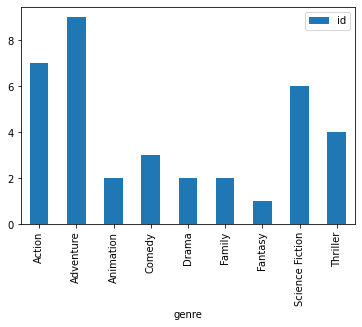

In [227]:
pop_genre.plot(kind = 'bar')

### Q.
creating tow tables of actors from two popular movies: 'Iron Man'  and 'Iron Man 2'.  Use an outer join to find actors who did not act in both movies.

In [228]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/casts.p'
casts = pd.read_pickle(url)

In [229]:
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [230]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [231]:
movies_casts = casts.merge(movies, right_on = 'id', left_on = 'movie_id', suffixes = ['_cast', '_movie'])
movies_casts.head()

,movie_id,cast_id,character,gender,id_cast,name,id_movie,title,popularity,release_date
0,5,22,Jezebel,1,3122,Sammi Davis,5,Four Rooms,22.87623,1995-12-09
1,5,23,Diana,1,3123,Amanda de Cadenet,5,Four Rooms,22.87623,1995-12-09
2,5,24,Athena,1,3124,Valeria Golino,5,Four Rooms,22.87623,1995-12-09
3,5,25,Elspeth,1,3125,Madonna,5,Four Rooms,22.87623,1995-12-09
4,5,26,Eva,1,3126,Ione Skye,5,Four Rooms,22.87623,1995-12-09


In [232]:
# just to check the eact movies title in the table
df_iron = movies_casts[movies_casts.title.str.startswith('Iron') ]
df_iron.title.unique()  

array(['Iron Man', 'Iron Man 2', 'Ironclad', 'Iron Man 3'], dtype=object)

In [233]:
df_ironman_1 = movies_casts[movies_casts.title == 'Iron Man' ]
df_ironman_1.head()

,movie_id,cast_id,character,gender,id_cast,name,id_movie,title,popularity,release_date
16946,1726,9,Yinsen,2,17857,Shaun Toub,1726,Iron Man,120.725053,2008-04-30
16947,1726,10,"Virginia ""Pepper"" Potts",1,12052,Gwyneth Paltrow,1726,Iron Man,120.725053,2008-04-30
16948,1726,11,Obadiah Stane / Iron Monger,2,1229,Jeff Bridges,1726,Iron Man,120.725053,2008-04-30
16949,1726,12,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",2,18288,Terrence Howard,1726,Iron Man,120.725053,2008-04-30
16950,1726,17,Christine Everhart,1,57451,Leslie Bibb,1726,Iron Man,120.725053,2008-04-30


In [234]:
df_ironman_2 = movies_casts[movies_casts.title == 'Iron Man 2' ]
df_ironman_2.head()

,movie_id,cast_id,character,gender,id_cast,name,id_movie,title,popularity,release_date
40541,10138,3,Ivan Vanko / Whiplash,2,2295,Mickey Rourke,10138,Iron Man 2,77.300194,2010-04-28
40542,10138,5,Natalie Rushman / Natasha Romanoff / Black Widow,1,1245,Scarlett Johansson,10138,Iron Man 2,77.300194,2010-04-28
40543,10138,6,Justin Hammer,2,6807,Sam Rockwell,10138,Iron Man 2,77.300194,2010-04-28
40544,10138,7,Director Nick Fury,2,2231,Samuel L. Jackson,10138,Iron Man 2,77.300194,2010-04-28
40545,10138,18,"Virginia ""Pepper"" Potts",1,12052,Gwyneth Paltrow,10138,Iron Man 2,77.300194,2010-04-28


In [235]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = df_ironman_1.merge(df_ironman_2,
                                     on = 'id_cast',
                                     how = 'outer',
                                     suffixes=['_1', '_2'])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
iron_1_and_2[m].head()

,movie_id_1,cast_id_1,character_1,gender_1,id_cast,name_1,id_movie_1,title_1,popularity_1,release_date_1,movie_id_2,cast_id_2,character_2,gender_2,name_2,id_movie_2,title_2,popularity_2,release_date_2
0,1726.0,9.0,Yinsen,2.0,17857,Shaun Toub,1726.0,Iron Man,120.725053,2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1726.0,11.0,Obadiah Stane / Iron Monger,2.0,1229,Jeff Bridges,1726.0,Iron Man,120.725053,2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1726.0,12.0,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",2.0,18288,Terrence Howard,1726.0,Iron Man,120.725053,2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1726.0,18.0,Raza,2.0,57452,Faran Tahir,1726.0,Iron Man,120.725053,2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1726.0,23.0,Abu Bakaar,2.0,173810,Sayed Badreya,1726.0,Iron Man,120.725053,2008-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Merging a table to itself
> When to merge at table to itself: Merging a table to itself can be useful when you want to compare values in a column to other values in the same column.     
#### Common situations:  
- Hierarchical relationships
- Sequential relationships
- Graph data

### Q
 By merging the table to itself, compare the value of the director from the jobs column to other values from the jobs column. With the output, you can quickly see different movie directors and the people they worked with in the same movie.

In [236]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/crews.p'
crews = pd.read_pickle(url)

In [237]:
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [238]:
crews_self_merged  = crews.merge(crews, on = 'id', suffixes = ['_dir', '_crew'])
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [239]:
# get the indexes of directors job in job_dir or other jobs rather than director in job_crew
indexes = (crews_self_merged.job_dir == 'Director')& (crews_self_merged.job_crew != 'Director')

In [240]:
director_crews = crews_self_merged[indexes]
director_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


### Index merge 
Merging based on index of two tables is just like other columns and we just need to pass the index name on= index_name, 
however, if the index names are differnt we need to set a boolean value for left_index and righ_index 

In [241]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/ratings.p'
ratings = pd.read_pickle(url)
ratings.set_index('id', inplace = True)
ratings.head()

,vote_average,vote_count
id,,
19995,7.2,11800.0
285,6.9,4500.0
206647,6.3,4466.0
49026,7.6,9106.0
49529,6.1,2124.0


In [242]:
movies.set_index('id', inplace = True)

In [243]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on = 'id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


In [244]:
movie_to_gen.set_index('movie_id', inplace = True)

In [245]:
# Merge to the movies table the movie_to_gen table on the index
movies_genre = movies.merge(movie_to_gen, left_on = 'id', right_on = 'movie_id', right_index = True)

# Print the first few rows of movies_ratings
movies_genre.head()

,title,popularity,release_date,genre
id,,,,
257,Oliver Twist,20.415572,2005-09-23,Crime
257,Oliver Twist,20.415572,2005-09-23,Drama
257,Oliver Twist,20.415572,2005-09-23,Family
14290,Better Luck Tomorrow,3.877036,2002-01-12,Crime
14290,Better Luck Tomorrow,3.877036,2002-01-12,Drama


### Q.
find out which movie sequels earned the most compared to the original movie

In [246]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/sequels.p'
sequels = pd.read_pickle(url)
sequels.head()

,id,title,sequel
0,19995,Avatar,<NA>
1,862,Toy Story,863
2,863,Toy Story 2,10193
3,597,Titanic,<NA>
4,24428,The Avengers,<NA>


In [247]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/financials.p'
financials = pd.read_pickle(url)
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [248]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on = 'id', how = 'left')
sequels_fin.head()

,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [249]:
diff_seql = sequels_fin.merge(sequels_fin, how = 'inner', left_on = 'id', right_on = 'sequel', suffixes = ['_org', '_seq'])

In [250]:
diff_seql.head()

,id_org,title_org,sequel_org,budget_org,revenue_org,id_seq,title_seq,sequel_seq,budget_seq,revenue_seq
0,863,Toy Story 2,10193,90000000.0,4.973669e+08,862,Toy Story,863,30000000.0,373554033.0
1,135397,Jurassic World,<NA>,150000000.0,1.513529e+09,331,Jurassic Park III,135397,93000000.0,368780809.0
2,68721,Iron Man 3,<NA>,200000000.0,1.215440e+09,10138,Iron Man 2,68721,200000000.0,623933331.0
3,271110,Captain America: Civil War,<NA>,250000000.0,1.153304e+09,100402,Captain America: The Winter Soldier,271110,170000000.0,714766572.0
4,122,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09,121,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0


In [251]:
diff_seql['diff_revenue'] = diff_seql['revenue_org']- diff_seql['revenue_seq']
diff_seql.head()

,id_org,title_org,sequel_org,budget_org,revenue_org,id_seq,title_seq,sequel_seq,budget_seq,revenue_seq,diff_revenue
0,863,Toy Story 2,10193,90000000.0,4.973669e+08,862,Toy Story,863,30000000.0,373554033.0,1.238128e+08
1,135397,Jurassic World,<NA>,150000000.0,1.513529e+09,331,Jurassic Park III,135397,93000000.0,368780809.0,1.144748e+09
2,68721,Iron Man 3,<NA>,200000000.0,1.215440e+09,10138,Iron Man 2,68721,200000000.0,623933331.0,5.915067e+08
3,271110,Captain America: Civil War,<NA>,250000000.0,1.153304e+09,100402,Captain America: The Winter Soldier,271110,170000000.0,714766572.0,4.385379e+08
4,122,The Lord of the Rings: The Return of the King,<NA>,94000000.0,1.118889e+09,121,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,1.926016e+08


In [252]:
# Select the title_org, title_seq, and diff 
titles_diff = diff_seql[['title_org','title_seq','diff_revenue']]

# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff_revenue', ascending = False).head()

,title_org,title_seq,diff_revenue
1,Jurassic World,Jurassic Park III,1.144748e+09
8,The Dark Knight,Batman Begins,6.303398e+08
2,Iron Man 3,Iron Man 2,5.915067e+08
6,Toy Story 3,Toy Story 2,5.696028e+08
5,Skyfall,Quantum of Solace,5.224703e+08


In [253]:
# we found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.

In [254]:
titles_diff[titles_diff['diff_revenue']<0]

,title_org,title_seq,diff_revenue
10,Harry Potter and the Half-Blood Prince,Harry Potter and the Order of the Phoenix,-4253541.0
26,Quantum of Solace,Casino Royale,-12955233.0
42,Austin Powers in Goldmember,Austin Powers: The Spy Who Shagged Me,-14284655.0
53,22 Jump Street,21 Jump Street,-13143714.0
84,Before Midnight,Before Sunset,-4816146.0
86,Evil Dead II,The Evil Dead,-23476956.0


### semi Join

- Returns the intersection, similar to an inner join
- Returns only columns from the le table and not the right
- No duplicates
<img src= semi_join.png>

### anti_join
- Returns the le table, excluding the intersection
- Returns only columns from the le table and not the right
<img src= anti_join.png>

an anti join by first merging the tables with a left join, selecting the ID of those employees who did not support a top customer, and then subsetting the original employee's table. From that, we can see that there are five employees not supporting top customers. Anti joins are a powerful tool to filter a main table (i.e. employees) by another (i.e. customers)

In [255]:
url = 'https://raw.githubusercontent.com/nafis-git/Data_analysis_python/main/pandas/data/business_owners.p'
business_owners = pd.read_pickle(url)
business_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


### vertical merging
> pandas .concat() method can
- concatenate both vertical and horizontal.axis=0 , vertical  
<code> pd.concat([inv_jan, inv_feb, inv_mar],
ignore_index=False,
keys=['jan','feb','mar'])</code>

### Using append method .append()
> Simpli,ed version of the .concat() method
- Supports: ignore_index , and sort
- Does Not Support: keys and join
- Always join = outer

### Validating merges
- merge(validate=None) :
> Checks if merge is of speci,ed type
'one_to_one'
'one_to_many'
'many_to_one'
'many_to_many'

### Verifying concatenations
> concat(verify_integrity=False) :
- Check whether the new concatenated index contains duplicates
- Default value is False

> If the verify_integrity is not satisfy meaning that there is duplicated rows then an error will be raised
 <code>pd.concat([inv_feb, inv_mar]
verify_integrity=True)</code>
Traceback (most recent call last):
ValueError: Indexes have overlapping
values: Int64Index([9], dtype='int64',
name='iid')